In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Questions

### Mine

1. Daily ridership peak;

2. The busier station overall;

4. Does subway stations get busier on weekends?

5. Stations most people go to/from;

5. Does weather affect station's flow? How?

### Caroline

1. What variables are related to subway ridership?

    1.1. Which stations have the most riders?
    
    1.2. What are the ridership patterns over time?
    
    1.3. How does the weather affect ridership?
    
2. What patterns can I find in the weather?

    2.1. Is the temperature rising throughout the month?
    
    2.2. How does weather vary across the city?



In [2]:
subway_df = pd.read_csv('nyc_subway_weather.csv')
 
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [2]:
import numpy as np

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [3]:
# Quiz 3

def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    station_with_max_riders_on_day_1 = ridership[0, :].argmax()
    
    overall_mean = ridership.mean()
    mean_for_max = ridership[:, station_with_max_riders_on_day_1].mean()
    
    return (overall_mean, mean_for_max)
    
mean_riders_for_max_station(ridership)

(2342.6, 3239.9)

In [5]:
# Change False to True for this block of code to see what it does

# NumPy axis argument
if False:
    a = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ])
    
    print a.sum()
    print a.sum(axis=0)
    print a.sum(axis=1)

In [6]:
# Quiz 4
def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    
    mean_ridership_per_day = ridership.mean(axis=1)
    mean_ridership_per_station = ridership.mean(axis=0)
    
    max_daily_ridership = mean_ridership_per_station.max()
    min_daily_ridership = mean_ridership_per_station.min()
    
    return (max_daily_ridership, min_daily_ridership)

min_and_max_riders_per_day(ridership)

(3239.9, 1071.2)

In [7]:
dv = pd.DataFrame({
    'acc': [333,444,555],
    'grade': [4.4,6.0,5]
})
dv

,acc,grade
0,333,4.4
1,444,6.0
2,555,5.0


In [ ]:
import pandas as pd

# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [ ]:
# DataFrame creation
if False:
    # You can create a DataFrame out of a dictionary mapping column names to values
    df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    print df_1

    # You can also use a list of lists or a 2D NumPy array
    df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
    print df_2

# Accessing elements
if False:
    print ridership_df.iloc[0]
    print ridership_df.loc['05-05-11']
    print ridership_df['R003']
    print ridership_df.iloc[1, 3]
    
# Accessing multiple rows
if False:
    print ridership_df.iloc[1:4]
    
# Accessing multiple columns
if False:
    print ridership_df[['R003', 'R005']]
    
# Pandas axis
if False:
    df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    #print df.sum()
    #print df.sum(axis=1)
    #print df.values.sum()
    print df.iloc[:,1]
    

In [58]:
# Quiz 6
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    
    station_with_max_rs_on_first_day = ridership.iloc[0].idxmax()
    
    overall_mean = ridership.values.mean()
    mean_for_max = ridership[station_with_max_rs_on_first_day].mean()
    
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership_df)

(2342.6, 3239.9)

In [74]:
#subway_df.head()
subway_df.describe()
#subway_df['ENTRIESn']

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [76]:
# Quiz 8

def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
   
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    correlations = \
    x.apply(lambda a: (a - x.mean())/x.std(ddof=0)) * \
    y.apply(lambda b: (b - y.mean())/y.std(ddof=0))
    
    return correlations.mean()

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print correlation(entries, rain)
print correlation(entries, temp)
print correlation(rain, temp)

print correlation(entries, cum_entries)

0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


In [ ]:
# Examples of vectorized operations on DataFrames:
# Change False to True for each block of code to see what it does

# Adding DataFrames with the column names
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
    print df1 + df2
    
# Adding DataFrames with overlapping column names 
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
    print df1 + df2

# Adding DataFrames with overlapping row indexes
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
    print df1 + df2

In [87]:
# --- Quiz --- 10
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    
    return (entries_and_exits - entries_and_exits.shift(1)).fillna(0)

get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,0.0,0.0
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [ ]:
# DataFrame applymap()
if False:
    df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
def add_one(x):
        return x + 1
        
    print df.applymap(add_one)
    

In [ ]:
# Quiz 11
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
    
def numerical_to_letter_grade(grade)
    if (grade >= 90)
        return 'A'
    return 'Preguica'
    
    
def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    return grades.applymap(numerical_to_letter_grade)

In [51]:
# Quiz 12

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# Change False to True for this block of code to see what it does

# DataFrame apply()
if False:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print convert_grades_curve(grades_df['exam1'])
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print grades_df.apply(convert_grades_curve)
    
def standardize(df):
    #return df.apply(lambda s: s.apply(lambda e: (e - s.mean())/s.std(ddof=0)))
    return df.apply(lambda s: (s - s.mean())/s.std(ddof=0))

standardize(grades_df)
#plt.plot(grades_df['exam1'])
#plt.plot(standardize(grades_df))

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [37]:
# Quiz 12
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# Change False to True for this block of code to see what it does

# DataFrame apply() - use case 2
if False:   
    print df.apply(np.mean)
    print df.apply(np.max)
    
def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(lambda s: s.values[s.values != s.max()].max())
    #return df.apply(lambda s: s.sort_values(ascending=False).iloc[1])

second_largest(df)

a     4
b    40
c    20
dtype: int64

In [42]:
# Change False to True for each block of code to see what it does

# Adding a Series to a square DataFrame
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    
# Adding a Series to a one-row DataFrame 
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print df
    print '' # Create a blank line between outputs
    print df + s

# Adding a Series to a one-column DataFrame
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    

    
# Adding when DataFrame column names match Series index
if False:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    
# Adding when DataFrame column names don't match Series index
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1   2   3   a   b   c   d
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


In [30]:
# Quiz 15

# Adding using +
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    
# Adding with axis='index'
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df.add(s, axis='index')
    # The functions sub(), mul(), and div() work similarly to add()
    
# Adding with axis='columns'
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df.add(s, axis='columns')
    # The functions sub(), mul(), and div() work similarly to add()
    
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    return (df - df.mean()) / df.std(ddof=0)

def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    #print df
    #print df.mean(axis='columns')
    a = df.sub(df.mean(axis='columns'), axis='rows')
    #print a
    #print ''
    #print df.std(ddof=0, axis='columns')
    return a.div(df.std(ddof=0, axis='columns'), axis='rows')

standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


In [63]:
# Quiz 16
from datetime import datetime as dt

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Examine DataFrame
if False:
    print example_df
    
# Examine groups
if False:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print grouped_data.groups
    
# Group by multiple columns
if False:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print grouped_data.groups
    
# Get sum of each group
if False:
    grouped_data = example_df.groupby('even')
    print grouped_data.sum()
    
# Limit columns in result
if False:
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print grouped_data.sum()['value']
    
    print '\n' # Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print grouped_data['value'].sum()

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.

subway_df['day_week'].unique() # [6, 0, 1, 2, 3, 4, 5]

# Diff between min and max dates
dates = pd.to_datetime(subway_df['DATEn'].unique())
(dates.max() - dates.min()).days # 30 days

data_mean_per_day_week = subway_df.groupby('day_week').mean()

ridership_by_day = data_mean_per_day_week['ENTRIESn_hourly']

#total_entries_per_day_week.reindex(\
#    pd.qcut(total_entries_per_day_week.index, 7, 
#        labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))

ridership_by_day.plot()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


In [98]:
subway_df.head(20)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.00,30.258000,55.980000,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.00,30.258000,55.980000,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.00,30.258000,55.980000,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.00,30.258000,55.980000,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.00,30.258000,55.980000,7.86,40.700348,-73.887177
5,R003,05-02-11,00:00:00,4388348,2911036,15.0,34.0,2011-05-02 00:00:00,0,0,...,30.31,0,50.0,6.9,0.00,30.238333,54.166667,8.25,40.700348,-73.887177
6,R003,05-02-11,04:00:00,5818689,3874767,19.0,40.0,2011-05-02 04:00:00,4,0,...,30.27,0,50.0,4.6,0.00,30.238333,54.166667,8.25,40.700348,-73.887177
7,R003,05-02-11,08:00:00,4388855,2911194,488.0,118.0,2011-05-02 08:00:00,8,0,...,30.30,0,53.1,10.4,0.00,30.238333,54.166667,8.25,40.700348,-73.887177
8,R003,05-02-11,12:00:00,4389345,2911326,490.0,132.0,2011-05-02 12:00:00,12,0,...,30.24,0,57.0,11.5,0.00,30.238333,54.166667,8.25,40.700348,-73.887177
9,R003,05-02-11,16:00:00,4389576,2911558,231.0,232.0,2011-05-02 16:00:00,16,0,...,30.16,0,59.0,11.5,0.00,30.238333,54.166667,8.25,40.700348,-73.887177


In [ ]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Standardize each group
if False:
    def standardize(xs):
        return (xs - xs.mean()) / xs.std()
    grouped_data = example_df.groupby('even')
    print grouped_data['value'].apply(standardize)
    
# Find second largest value in each group
if False:
    def second_largest(xs):
        sorted_xs = xs.sort(inplace=False, ascending=False)
        return sorted_xs.iloc[1]
    grouped_data = example_df.groupby('even')
    print grouped_data['value'].apply(second_largest)

In [38]:
# Quiz 17
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    
    unit_groups = entries_and_exits.groupby('UNIT')
    
    cumulative_entries_and_exits = unit_groups[['ENTRIESn', 'EXITSn']].apply(
        lambda g: (g - g.shift(1)).fillna(0))
    
    #print cumulative_entries_and_exits

    #entries_and_exits[['ENTRIES', 'EXITS']] = cumulative_entries_and_exits[['ENTRIESn', 'EXITSn']]
    #print entries_and_exits
    return cumulative_entries_and_exits

get_hourly_entries_and_exits(ridership_df)

,ENTRIESn,EXITSn
0,0.0,0.0
1,0.0,0.0
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


In [41]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return subway_df.merge(weather_df, on=['DATEn', 'hour', 'latitude', 'longitude'])

combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


0   235774591


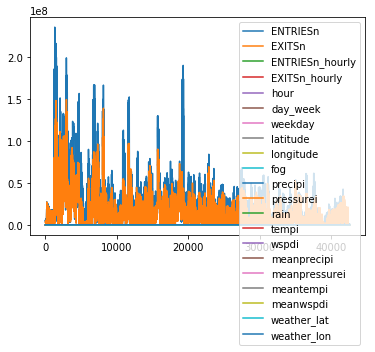

In [44]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

print subway_df['ENTRIESn'].min(), ' ', subway_df['ENTRIESn'].max()

subway_df.plot()

In [60]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for this block of code to see what it does

# groupby() without as_index
if False:
    first_even = example_df.groupby('even').first()
    print first_even
    print first_even['even'] # Causes an error. 'even' is no longer a column in the DataFrame
    
# groupby() with as_index=False
if False:
    first_even = example_df.groupby('even', as_index=False).first()
    print first_even
    print first_even['even'] # Now 'even' is still a column in the DataFrame

filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!

In [14]:
'''
Os histogramas de número de passageiros do metrô 
em dias com chuva e dias sem chuva
'''

# % of rainy days = 0.2247414945250768
# len(subway_df.loc[subway_df['rain'] == 1]) / float(len(subway_df))

a = subway_df.groupby(['rain', 'UNIT']).mean()

b = ao
b['people_balance'] = b['ENTRIESn_hourly'] - b['EXITSn_hourly']
b

ENTRIESn        EXITSn  ENTRIESn_hourly  EXITSn_hourly  \
rain UNIT                                                               
0    R003  4.304596e+06  2.855952e+06       223.767442     155.713178   
     R004  1.374914e+07  1.352887e+07       542.029197     409.087591   
     R005  1.277900e+07  1.230514e+07       538.797101     421.478261   
     R006  9.712060e+06  8.715956e+06       627.094203     436.862319   
     R007  8.380166e+06  8.414115e+06       378.269231     305.215385   
     R008  1.074050e+07  1.059038e+07       404.847328     329.152672   
     R009  4.435358e+06  4.114087e+06       334.458647     273.413534   
     R011  1.532876e+08  6.937645e+07      7007.654930    2558.880282   
     R012  1.728111e+08  1.083998e+08      8327.923611    5612.868056   
     R013  2.925866e+07  4.017933e+07      2484.736111    3341.270833   
     R016  2.237649e+07  2.604215e+07       747.535211     832.267606   
     R017  9.950545e+07  7.155126e+07      3974.604167    3239.576389   
     R018  7.535788e+07  5.927531e+07      7815.811189    6455.160839   
     R019  7.405656e+07  4.030289e+07      3265.861111    1578.513889   
     R020  1.103880e+08  9.123483e+07      6013.041667    5726.583333   
     R021  7.641352e+07  7.339123e+07      4532.091549    3927.105634   
     R022  1.481319e+08  1.130189e+08      9379.472222    7837.222222   
     R023  9.155179e+07  4.500197e+07      6004.340278    2715.000000   
     R024  3.175475e+07  3.056791e+07      3244.447552    2953.580420   
     R025  6.846517e+07  2.713484e+07      5419.152778    3123.861111   
     R027  8.160381e+07  7.306788e+07      2812.597222    2741.534722   
     R029  1.127906e+08  7.033169e+07      6973.451389    3984.013889   
     R030  4.202119e+07  3.985184e+07      2972.208333    2896.500000   
     R031  7.827918e+07  4.686501e+07      4214.756944    3565.722222   
     R032  3.329245e+07  5.014212e+07      4248.188811    6319.930070   
     R033  1.128114e+08  5.617069e+07      8158.222222    4444.916667   
     R034  9.591443e+06  9.478435e+06      1227.977099    1240.595420   
     R035  4.416322e+07  1.640245e+07      2779.204225     909.823944   
     R036  2.615024e+07  1.147814e+07       819.348148     211.688889   
     R037  1.637802e+07  3.131900e+06       848.267606     771.978873   
...                 ...           ...              ...            ...   
1    R321  2.944025e+07  1.599364e+07      1186.428571     724.714286   
     R322  1.382686e+07  1.677256e+07      1875.619048    2109.309524   
     R323  1.200346e+07  7.183485e+06      1439.125000     846.875000   
     R325  4.331997e+06  4.618393e+06       432.550000     474.150000   
     R330  1.168430e+07  1.191727e+07      1161.925000    1184.300000   
     R335  6.538527e+06  5.969377e+06       501.218750     367.343750   
     R336  5.801404e+06  6.271928e+06       118.558824     336.147059   
     R337  1.616094e+06  2.300330e+06       169.823529     134.029412   
     R338  1.359308e+06  7.381824e+05        25.550000     109.425000   
     R341  6.488607e+06  9.992057e+05       637.571429      68.114286   
     R344  7.077172e+06  3.851539e+05       548.187500      23.750000   
     R345  6.629523e+06  5.194915e+06       601.025000     535.225000   
     R346  1.512968e+07  1.104618e+07      1511.564103    1445.512821   
     R348  5.785259e+05  2.126076e+05       235.025000      83.125000   
     R354  3.636383e+06  3.193929e+06       270.394737     249.736842   
     R356  9.789785e+06  8.753734e+06      1183.619048     957.095238   
     R358  4.482587e+06  4.893046e+06       316.882353     309.588235   
     R370  1.423709e+07  8.378959e+06       616.512195     355.292683   
     R371  1.603084e+07  9.054244e+06       909.692308     327.794872   
     R372  1.318195e+07  1.107436e+07       871.000000     467.153846   
     R373  9.920581e+06  1.180419e+07       748.212121     445.363636   
     R382  2.058984e+07  1.633680e+07       948.439024     873.878049   


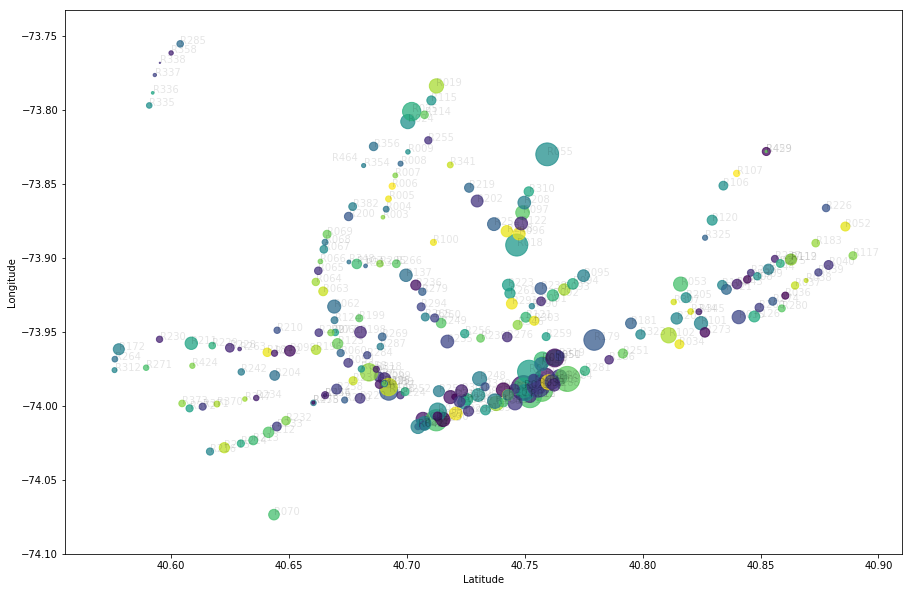

In [62]:
'''
Um gráfico de dispersão das estações de metrô com a latitude e longitude 
como os eixos x e y, e o número de viagens como o tamanho da bolha
    Se você escolher esta opção, você pode querer usar o argumento 
    as_index=false para o groupby(). Há exemplo de código nos quizzes seguintes.
'''
unit_groups = subway_df.groupby('UNIT', as_index=False)
mean_data_per_unit = unit_groups.mean()

x = mean_data_per_unit['latitude']
y = mean_data_per_unit['longitude']
s = mean_data_per_unit['ENTRIESn_hourly'].apply(lambda e: e ** 1/16)
c = np.random.rand(len(mean_data_per_unit))

f, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.scatter(x, y, s, c, alpha=0.75)

plt.xlabel('Latitude')
plt.ylabel('Longitude')

for index, unit in enumerate(mean_data_per_unit['UNIT']):
    ax.annotate(unit, (x[index], y[index]), alpha=0.1)

In [ ]:
'''
Um gráfico de dispersão com número de passageiros do metrô 
em um eixo e precipitação ou a temperatura no outro
'''